In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

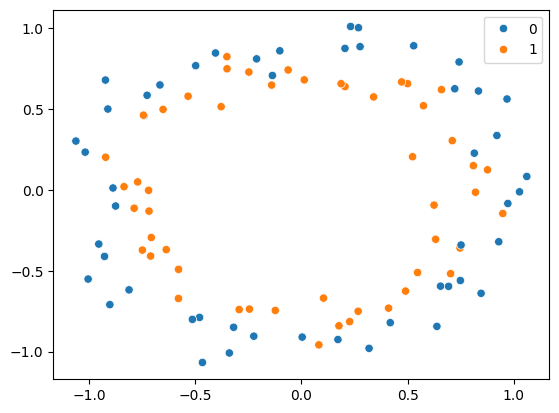

In [5]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
model = Sequential()
model.add(Input(shape=(2, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

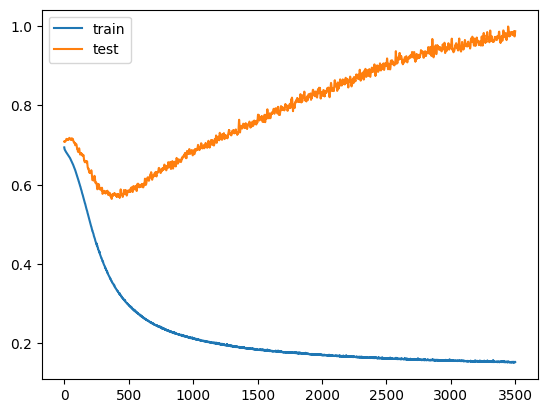

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


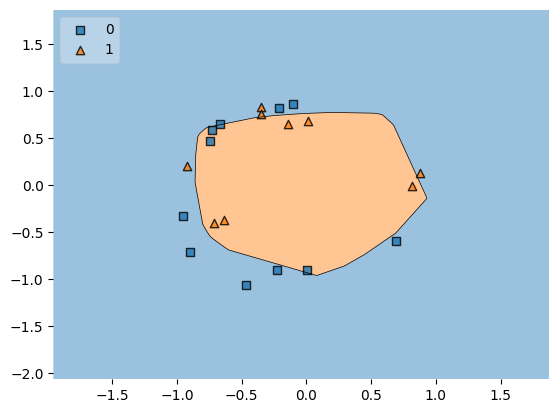

In [13]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [17]:
model = Sequential()
model.add(Input(shape=(2, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 72ms/step - loss: 0.6717 - accuracy: 0.5875 - val_loss: 0.7219 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 35ms/step - loss: 0.6710 - accuracy: 0.5875 - val_loss: 0.7219 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 45ms/step - loss: 0.6702 - accuracy: 0.5875 - val_loss: 0.7213 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6695 - accuracy: 0.5875 - val_loss: 0.7208 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6688 - accuracy: 0.5875 - val_loss: 0.7211 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6681 - accuracy: 0.5875 - val_loss: 0.7211 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6673 - accuracy: 0.5875 - val_loss: 0.7214 - val_accuracy: 0.4000
Epoch 8/3500


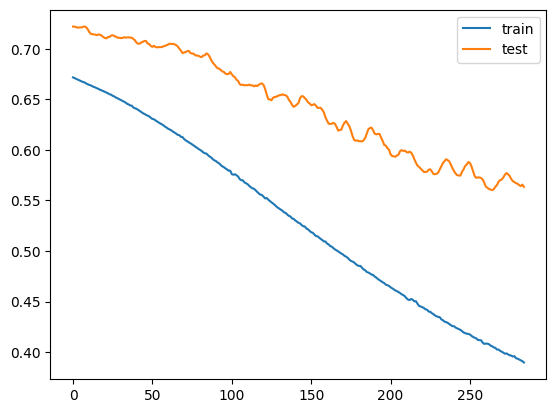

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


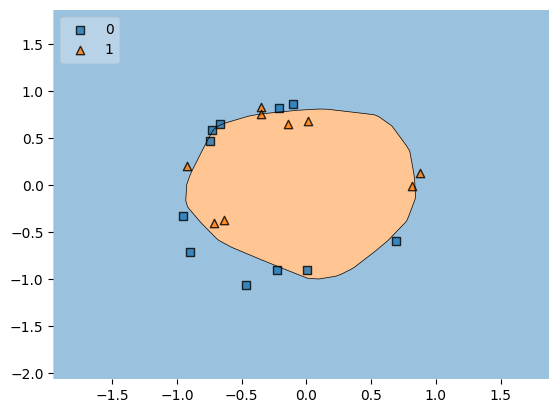

In [23]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()